In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\DELL\.cache\kagglehub\datasets\dylanjcastillo\7k-books-with-metadata\versions\3


In [2]:
import pandas as pd

In [3]:
books=pd.read_csv(f"{path}/books.csv")

In [4]:
print("Unique Values")
print(books.nunique())
print(" ")

Unique Values
isbn13            6810
isbn10            6810
title             6398
subtitle          2009
authors           3780
categories         567
thumbnail         6481
description       6474
published_year      94
average_rating     200
num_pages          915
ratings_count     3881
dtype: int64
 


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

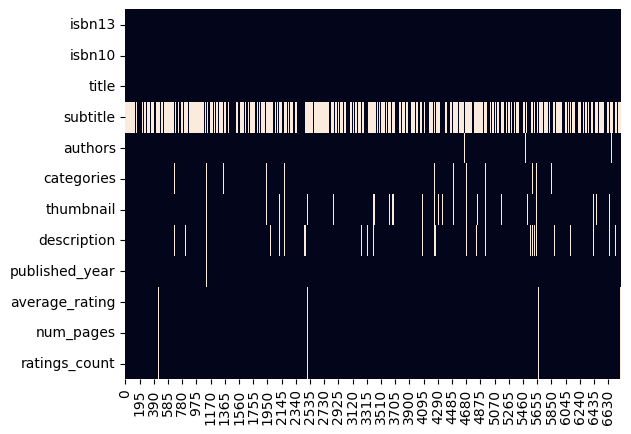

In [6]:
ax=plt.axes()
sns.heatmap(books.isna().transpose(),cbar=False,ax=ax)
plt.xlabel=("Columns")
plt.ylabel=("Missing Values")
plt.show()

In [7]:
import numpy as np
books["missing_description"]=np.where(books["description"].isna(),1,0)
books["age_of_book"]=2025-books["published_year"]

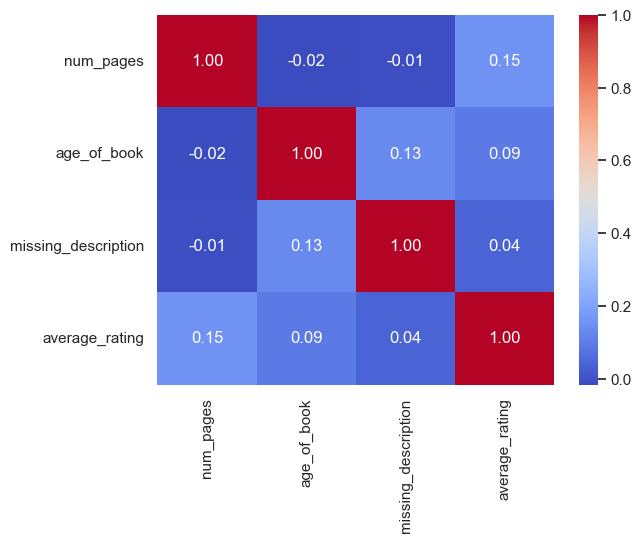

In [8]:
columns_interested=["num_pages","age_of_book","missing_description","average_rating"]
corelation_matrix=books[columns_interested].corr(method="spearman")
# spearman -> discrete data
# check corelation
sns.set_theme(style="white")
plt.Figure(figsize=(4,4))
heatmap=sns.heatmap(corelation_matrix,annot=True,fmt=".2f",cmap="coolwarm")

In [9]:
to_be_removed=books[(books["missing_description"].isna())|
      (books["num_pages"].isna())|
      (books["average_rating"].isna())|
      (books["published_year"].isna())]
print(len(to_be_removed))

48


In [10]:
books_cleaned=books.drop(to_be_removed.index)
books_cleaned

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,43.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,26.0
6806,9788185944609,8185944601,Secrets Of The Heart,NaN,Khalil Gibran,Mysticism,http://books.google.com/books/content?id=XcrVp...,NaN,1993.0,4.08,74.0,324.0,1,32.0
6807,9788445074879,8445074873,Fahrenheit 451,NaN,Ray Bradbury,Book burning,NaN,NaN,2004.0,3.98,186.0,5733.0,1,21.0
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0,0,44.0


In [11]:
books_cleaned["categories"].value_counts().reset_index().sort_values("count",ascending=False)
# will be resolved using llm and text classification

,categories,count
0,Fiction,2574
1,Juvenile Fiction,537
2,Biography & Autobiography,399
3,History,263
4,Literary Criticism,166
...,...,...
553,Estados Unidos - Relaciones exteriores - 1945-...,1
552,"Authors, Cuban",1
551,Death (Fictitious character : Gaiman),1
550,Astronomers,1


In [ ]:
books_cleaned["words_in_description"]=books_cleaned["description"].str.split().str.len()
books_cleaned

In [ ]:
books_missing_25_words=books_cleaned[books_cleaned["words_in_description"]>=25]
books_missing_25_words["title_and_subtitle"]=(
    np.where(books_missing_25_words["subtitle"].isna(),books_missing_25_words["title"],
             books_missing_25_words[["subtitle","title"]].astype(str).agg(": ".join,axis=1))
)

In [ ]:
books_missing_25_words["tagged_description"]=books_missing_25_words[["isbn13","description"]].astype(str).agg(" ".join,axis=1)

In [15]:
books_missing_25_words
books_missing_25_words.drop(["subtitle","missing_description","age_of_book","words_in_description"],axis=1).to_csv("books_cleaned.csv",index=False)